<a href="https://colab.research.google.com/github/By41k/KNN/blob/main/TestTaskKnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тестовое задание: определить к какому классу относится точка на плоскости.

Работу выполнял студент группы М3О-409Б-21 Бычинский Егор

Задание выполняется методом k-ближайших соседей

In [77]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split

Создаем случайную задачу классификации

In [78]:
classification_problem = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=2,
)

Разбиваем выборку на обучающую и тестовую

In [79]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *classification_problem,
    test_size=0.01,
    random_state=1,
)

Отрисуем полученные точки:
Синие(1) - это один класс, красные(0) - это другой класс, зеленая звезда - тестовая точка, для которой нужно будет найти ближайших соседей и понять, к какому классу она относится

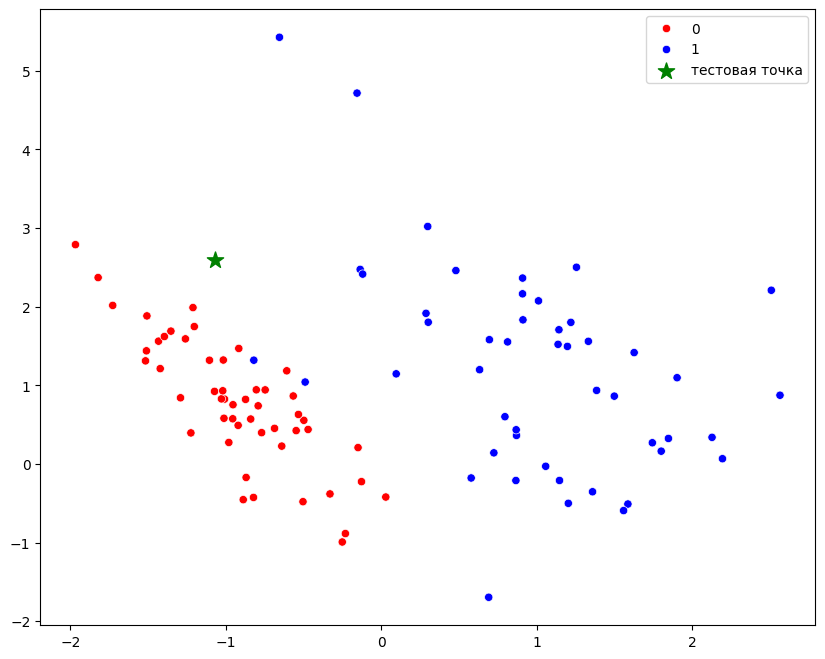

In [92]:
cmap_bold = ["red", "blue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=train_data[:, 0],
    y=train_data[:, 1],
    hue=train_labels,
    palette=cmap_bold
)

plt.scatter(test_data[:, 0], test_data[:, 1], c='green', marker='*', s=150, label='тестовая точка')
plt.legend();

In [81]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors # k-ближайшие соседи(в данном случае k = 3)

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train
    # Евклидово расстояние
    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i) # расстояния до всех соседей
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]

        return np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [93]:
knn_clf = KNearestNeighbors()
knn_clf.fit(train_data, train_labels)
knn_clf_pred_res = knn_clf.predict(test_data)

print(knn_clf_pred_res)
print("Точка приндлежит классу красный" if knn_clf_pred_res == [0] else "Точка приндлежит классу синий")

[0]
Точка приндлежит классу красный
